<a href="https://colab.research.google.com/github/rohanrohan2012/test/blob/master/elections_simple_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [120]:
url='https://raw.githubusercontent.com/rohanrohan2012/ipl_datasets/master/election/presidential_polls.csv'
df = pd.read_csv(url)
df.head(5)


,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,24316.0,lv,6.139129,37.69,35.07,6.18,NaN,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1128.0,lv,4.197292,45.00,46.00,3.00,NaN,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1024.0,lv,3.876856,48.00,42.00,6.00,NaN,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,1251.0,lv,3.403096,48.00,45.00,2.00,NaN,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,2120.0,rv,3.394646,46.00,40.00,6.00,NaN,45.32744,42.20888,3.618320,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,15:09:38 1 Nov 2016


In [121]:
df.shape

(10236, 27)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 27 columns):
cycle               10236 non-null int64
branch              10236 non-null object
type                10236 non-null object
matchup             10236 non-null object
forecastdate        10236 non-null object
state               10236 non-null object
startdate           10236 non-null object
enddate             10236 non-null object
pollster            10236 non-null object
grade               9102 non-null object
samplesize          10233 non-null float64
population          10236 non-null object
poll_wt             10236 non-null float64
rawpoll_clinton     10236 non-null float64
rawpoll_trump       10236 non-null float64
rawpoll_johnson     6480 non-null float64
rawpoll_mcmullin    51 non-null float64
adjpoll_clinton     10236 non-null float64
adjpoll_trump       10236 non-null float64
adjpoll_johnson     6480 non-null float64
adjpoll_mcmullin    51 non-null float64
multivers

In [0]:

cols = ['branch','type','matchup','startdate','enddate','rawpoll_johnson','rawpoll_mcmullin','adjpoll_johnson','adjpoll_mcmullin','multiversions','url','poll_id','question_id','createddate','timestamp']

In [124]:
df = df.drop(['cycle'],axis=1)
df.head()

,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,24316.0,lv,6.139129,37.69,35.07,6.18,NaN,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1128.0,lv,4.197292,45.00,46.00,3.00,NaN,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016
2,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1024.0,lv,3.876856,48.00,42.00,6.00,NaN,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,1251.0,lv,3.403096,48.00,45.00,2.00,NaN,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
4,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,2120.0,rv,3.394646,46.00,40.00,6.00,NaN,45.32744,42.20888,3.618320,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,15:09:38 1 Nov 2016


In [125]:
df.drop(cols,axis=1,inplace=True)
df.head()

,forecastdate,state,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump
0,11/1/16,U.S.,Google Consumer Surveys,B,24316.0,lv,6.139129,37.69,35.07,42.64140,40.86509
1,11/1/16,U.S.,ABC News/Washington Post,A+,1128.0,lv,4.197292,45.00,46.00,43.29659,44.72984
2,11/1/16,Virginia,ABC News/Washington Post,A+,1024.0,lv,3.876856,48.00,42.00,46.29779,40.72604
3,11/1/16,Florida,SurveyUSA,A,1251.0,lv,3.403096,48.00,45.00,46.35931,45.30585
4,11/1/16,U.S.,Pew Research Center,B+,2120.0,rv,3.394646,46.00,40.00,45.32744,42.20888


In [126]:
df

,forecastdate,state,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump
0,11/1/16,U.S.,Google Consumer Surveys,B,24316.0,lv,6.139129,37.69,35.07,42.64140,40.86509
1,11/1/16,U.S.,ABC News/Washington Post,A+,1128.0,lv,4.197292,45.00,46.00,43.29659,44.72984
2,11/1/16,Virginia,ABC News/Washington Post,A+,1024.0,lv,3.876856,48.00,42.00,46.29779,40.72604
3,11/1/16,Florida,SurveyUSA,A,1251.0,lv,3.403096,48.00,45.00,46.35931,45.30585
4,11/1/16,U.S.,Pew Research Center,B+,2120.0,rv,3.394646,46.00,40.00,45.32744,42.20888
...,...,...,...,...,...,...,...,...,...,...,...
10231,11/1/16,Alabama,Ipsos,A-,341.0,lv,0.000000,38.30,53.84,37.30964,54.76821
10232,11/1/16,Virginia,Ipsos,A-,479.0,lv,0.000000,50.49,39.05,49.13094,39.41588
10233,11/1/16,Virginia,Ipsos,A-,452.0,lv,0.000000,46.54,40.04,45.97130,39.97518
10234,11/1/16,North Carolina,Public Policy Polling,B+,947.0,v,0.000000,43.00,43.00,45.29390,46.66175


In [0]:
dummies =[]
dummies.append(pd.get_dummies(df['population']))

In [0]:
df_dummies = pd.concat(dummies,axis=1)

In [129]:
df_dummies

,a,lv,rv,v
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
10231,0,1,0,0
10232,0,1,0,0
10233,0,1,0,0
10234,0,0,0,1


In [130]:
df = pd.concat((df,df_dummies),axis=1)
df.head()

,forecastdate,state,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,a,lv,rv,v
0,11/1/16,U.S.,Google Consumer Surveys,B,24316.0,lv,6.139129,37.69,35.07,42.64140,40.86509,0,1,0,0
1,11/1/16,U.S.,ABC News/Washington Post,A+,1128.0,lv,4.197292,45.00,46.00,43.29659,44.72984,0,1,0,0
2,11/1/16,Virginia,ABC News/Washington Post,A+,1024.0,lv,3.876856,48.00,42.00,46.29779,40.72604,0,1,0,0
3,11/1/16,Florida,SurveyUSA,A,1251.0,lv,3.403096,48.00,45.00,46.35931,45.30585,0,1,0,0
4,11/1/16,U.S.,Pew Research Center,B+,2120.0,rv,3.394646,46.00,40.00,45.32744,42.20888,0,0,1,0


In [131]:
df.drop(['population'],axis=1,inplace=True)
df

,forecastdate,state,pollster,grade,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,a,lv,rv,v
0,11/1/16,U.S.,Google Consumer Surveys,B,24316.0,6.139129,37.69,35.07,42.64140,40.86509,0,1,0,0
1,11/1/16,U.S.,ABC News/Washington Post,A+,1128.0,4.197292,45.00,46.00,43.29659,44.72984,0,1,0,0
2,11/1/16,Virginia,ABC News/Washington Post,A+,1024.0,3.876856,48.00,42.00,46.29779,40.72604,0,1,0,0
3,11/1/16,Florida,SurveyUSA,A,1251.0,3.403096,48.00,45.00,46.35931,45.30585,0,1,0,0
4,11/1/16,U.S.,Pew Research Center,B+,2120.0,3.394646,46.00,40.00,45.32744,42.20888,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,11/1/16,Alabama,Ipsos,A-,341.0,0.000000,38.30,53.84,37.30964,54.76821,0,1,0,0
10232,11/1/16,Virginia,Ipsos,A-,479.0,0.000000,50.49,39.05,49.13094,39.41588,0,1,0,0
10233,11/1/16,Virginia,Ipsos,A-,452.0,0.000000,46.54,40.04,45.97130,39.97518,0,1,0,0
10234,11/1/16,North Carolina,Public Policy Polling,B+,947.0,0.000000,43.00,43.00,45.29390,46.66175,0,0,0,1


In [132]:
df_us = df[df.state == 'U.S.']
df_us

,forecastdate,state,pollster,grade,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,a,lv,rv,v
0,11/1/16,U.S.,Google Consumer Surveys,B,24316.0,6.139129e+00,37.69,35.07,42.64140,40.86509,0,1,0,0
1,11/1/16,U.S.,ABC News/Washington Post,A+,1128.0,4.197292e+00,45.00,46.00,43.29659,44.72984,0,1,0,0
4,11/1/16,U.S.,Pew Research Center,B+,2120.0,3.394646e+00,46.00,40.00,45.32744,42.20888,0,0,1,0
5,11/1/16,U.S.,Fox News/Anderson Robbins Research/Shaw & Comp...,A,1221.0,3.346535e+00,44.00,41.00,44.65080,42.26663,0,1,0,0
6,11/1/16,U.S.,IBD/TIPP,A-,1018.0,3.275062e+00,44.60,43.70,46.21834,43.56017,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10113,11/1/16,U.S.,Ipsos,A-,250.0,3.220000e-09,38.00,41.00,35.93998,40.02069,0,1,0,0
10114,11/1/16,U.S.,Ipsos,A-,289.0,1.980000e-09,43.00,33.00,41.02875,31.63534,0,1,0,0
10115,11/1/16,U.S.,Morning Consult,NaN,2001.0,1.620000e-09,44.00,43.00,45.01414,44.31849,0,0,1,0
10142,11/1/16,U.S.,The Times-Picayune/Lucid,NaN,912.0,0.000000e+00,45.00,35.00,47.26828,40.35918,0,1,0,0


In [133]:
by_state = df.state.unique()
by_state

array(['U.S.', 'Virginia', 'Florida', 'Pennsylvania', 'California',
       'North Carolina', 'Missouri', 'Colorado', 'Arizona',
       'New Hampshire', 'Ohio', 'Wisconsin', 'New Mexico', 'Iowa',
       'Minnesota', 'Texas', 'Maine', 'Georgia', 'Nevada', 'Kentucky',
       'Vermont', 'Idaho', 'South Carolina', 'New York', 'Michigan',
       'Kansas', 'Illinois', 'Indiana', 'Utah', 'South Dakota', 'Montana',
       'Washington', 'Massachusetts', 'Louisiana', 'Oregon', 'Maryland',
       'New Jersey', 'Alaska', 'Mississippi', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-3', 'Nebraska CD-1', 'Connecticut', 'Tennessee',
       'Oklahoma', 'Alabama', 'Arkansas', 'Hawaii', 'Delaware',
       'Rhode Island', 'Nebraska', 'Nebraska CD-2', 'Wyoming',
       'West Virginia', 'District of Columbia', 'North Dakota'],
      dtype=object)

In [0]:
df_us=df_us.drop(['grade'],axis=1)

In [135]:
df_us

,forecastdate,state,pollster,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,a,lv,rv,v
0,11/1/16,U.S.,Google Consumer Surveys,24316.0,6.139129e+00,37.69,35.07,42.64140,40.86509,0,1,0,0
1,11/1/16,U.S.,ABC News/Washington Post,1128.0,4.197292e+00,45.00,46.00,43.29659,44.72984,0,1,0,0
4,11/1/16,U.S.,Pew Research Center,2120.0,3.394646e+00,46.00,40.00,45.32744,42.20888,0,0,1,0
5,11/1/16,U.S.,Fox News/Anderson Robbins Research/Shaw & Comp...,1221.0,3.346535e+00,44.00,41.00,44.65080,42.26663,0,1,0,0
6,11/1/16,U.S.,IBD/TIPP,1018.0,3.275062e+00,44.60,43.70,46.21834,43.56017,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10113,11/1/16,U.S.,Ipsos,250.0,3.220000e-09,38.00,41.00,35.93998,40.02069,0,1,0,0
10114,11/1/16,U.S.,Ipsos,289.0,1.980000e-09,43.00,33.00,41.02875,31.63534,0,1,0,0
10115,11/1/16,U.S.,Morning Consult,2001.0,1.620000e-09,44.00,43.00,45.01414,44.31849,0,0,1,0
10142,11/1/16,U.S.,The Times-Picayune/Lucid,912.0,0.000000e+00,45.00,35.00,47.26828,40.35918,0,1,0,0


In [136]:
df_us.forecastdate.unique()

array(['11/1/16'], dtype=object)

In [137]:
df_us=df_us.drop(['forecastdate'],axis=1)
df_us

,state,pollster,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,a,lv,rv,v
0,U.S.,Google Consumer Surveys,24316.0,6.139129e+00,37.69,35.07,42.64140,40.86509,0,1,0,0
1,U.S.,ABC News/Washington Post,1128.0,4.197292e+00,45.00,46.00,43.29659,44.72984,0,1,0,0
4,U.S.,Pew Research Center,2120.0,3.394646e+00,46.00,40.00,45.32744,42.20888,0,0,1,0
5,U.S.,Fox News/Anderson Robbins Research/Shaw & Comp...,1221.0,3.346535e+00,44.00,41.00,44.65080,42.26663,0,1,0,0
6,U.S.,IBD/TIPP,1018.0,3.275062e+00,44.60,43.70,46.21834,43.56017,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10113,U.S.,Ipsos,250.0,3.220000e-09,38.00,41.00,35.93998,40.02069,0,1,0,0
10114,U.S.,Ipsos,289.0,1.980000e-09,43.00,33.00,41.02875,31.63534,0,1,0,0
10115,U.S.,Morning Consult,2001.0,1.620000e-09,44.00,43.00,45.01414,44.31849,0,0,1,0
10142,U.S.,The Times-Picayune/Lucid,912.0,0.000000e+00,45.00,35.00,47.26828,40.35918,0,1,0,0


<Figure size 720x1440 with 0 Axes>

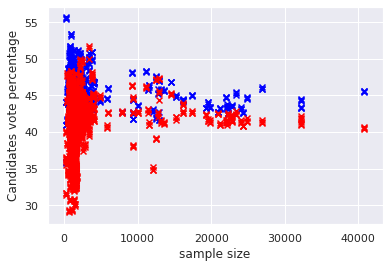

<Figure size 720x1440 with 0 Axes>

In [138]:
plt.scatter(df_us.samplesize,df_us.adjpoll_clinton,marker='x',color='blue')
plt.scatter(df_us.samplesize,df_us.adjpoll_trump,marker='x',color='red')
plt.xlabel("sample size")
plt.ylabel('Candidates vote percentage')
plt.figure(figsize=(10,20))


In [139]:
df_us['adjpoll_clinton'].mean()

44.45489791626407

In [140]:
df_us['adjpoll_trump'].mean()

41.04682024798712

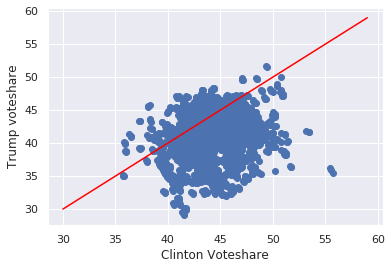

In [141]:
plt.scatter(df_us.adjpoll_clinton,df_us.adjpoll_trump)
plt.xlabel('Clinton Voteshare')
plt.ylabel('Trump voteshare')
var=[]
for i in range(30,60):
    var.append(i)
plt.plot(var,var,color='red')
plt.show()

In [142]:
trump_below_40 = df_us[df_us.adjpoll_trump < 40.00]
trump_below_40

,state,pollster,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,a,lv,rv,v
8,U.S.,Ipsos,1158.0,3.144926e+00,41.7,36.4,41.22576,37.24948,0,1,0,0
16,U.S.,GfK Group,1212.0,2.714895e+00,51.0,37.0,50.18283,39.33826,0,1,0,0
20,U.S.,Selzer & Company,1000.0,2.538795e+00,47.0,38.0,46.84417,39.99571,0,1,0,0
45,U.S.,Suffolk University,1000.0,2.180449e+00,47.4,37.6,46.95812,39.36292,0,1,0,0
62,U.S.,NBC News/Wall Street Journal,724.0,2.125523e+00,43.0,34.0,41.91822,36.25222,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10108,U.S.,Ipsos,1130.0,8.710000e-09,43.5,30.7,41.50998,29.41191,0,1,0,0
10109,U.S.,Ipsos,514.0,6.910000e-09,43.5,35.7,41.43517,34.74591,0,1,0,0
10110,U.S.,Ipsos,876.0,6.490000e-09,42.6,32.1,40.61682,30.78579,0,1,0,0
10111,U.S.,Ipsos,620.0,4.400000e-09,43.5,30.6,41.52278,29.26057,0,1,0,0


In [143]:
df_us.shape

(3105, 12)

In [144]:
trump_above_55 = df_us[df_us.adjpoll_trump > 55.00]
trump_above_55

,state,pollster,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,a,lv,rv,v


In [145]:
clinton_above_55 = df_us[df_us.adjpoll_clinton > 55.00]
clinton_above_55

,state,pollster,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,a,lv,rv,v
1735,U.S.,RAND (American Life Panel),336.0,0.007834,57.7,32.5,55.73744,35.49670,0,1,0,0
5150,U.S.,RAND (American Life Panel),336.0,0.006225,57.7,32.5,55.53419,35.88838,0,1,0,0
8559,U.S.,RAND (American Life Panel),336.0,0.007834,57.7,32.5,55.43084,36.22523,0,1,0,0


In [146]:
df_us['adjpoll_trump'].std()

3.3644028874692222

In [147]:
df_us['adjpoll_clinton'].std()

2.5165652198508117

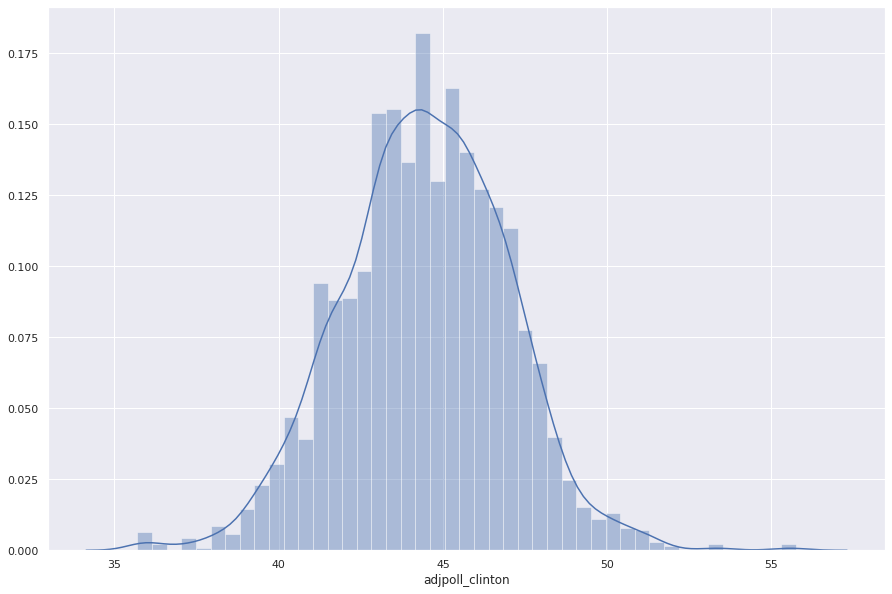

In [148]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_us['adjpoll_clinton'])

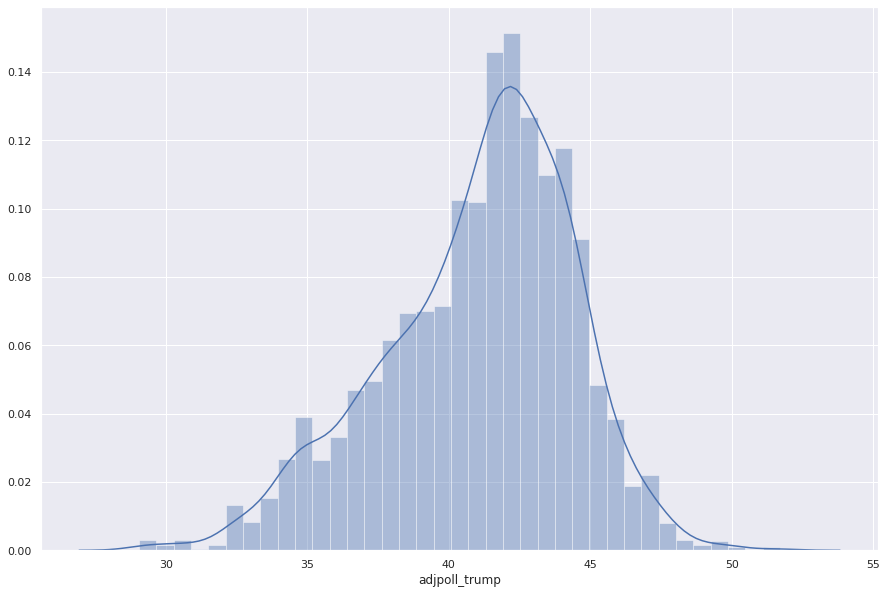

In [149]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_us['adjpoll_trump'])

In [150]:
df_us

,state,pollster,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,a,lv,rv,v
0,U.S.,Google Consumer Surveys,24316.0,6.139129e+00,37.69,35.07,42.64140,40.86509,0,1,0,0
1,U.S.,ABC News/Washington Post,1128.0,4.197292e+00,45.00,46.00,43.29659,44.72984,0,1,0,0
4,U.S.,Pew Research Center,2120.0,3.394646e+00,46.00,40.00,45.32744,42.20888,0,0,1,0
5,U.S.,Fox News/Anderson Robbins Research/Shaw & Comp...,1221.0,3.346535e+00,44.00,41.00,44.65080,42.26663,0,1,0,0
6,U.S.,IBD/TIPP,1018.0,3.275062e+00,44.60,43.70,46.21834,43.56017,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10113,U.S.,Ipsos,250.0,3.220000e-09,38.00,41.00,35.93998,40.02069,0,1,0,0
10114,U.S.,Ipsos,289.0,1.980000e-09,43.00,33.00,41.02875,31.63534,0,1,0,0
10115,U.S.,Morning Consult,2001.0,1.620000e-09,44.00,43.00,45.01414,44.31849,0,0,1,0
10142,U.S.,The Times-Picayune/Lucid,912.0,0.000000e+00,45.00,35.00,47.26828,40.35918,0,1,0,0


In [151]:
df_us_rv = df_us[df_us.rv == 1]
df_us_rv.shape

(543, 12)

In [152]:
df_us_lv = df_us[df_us.lv == 1]
df_us_lv.shape

(2538, 12)

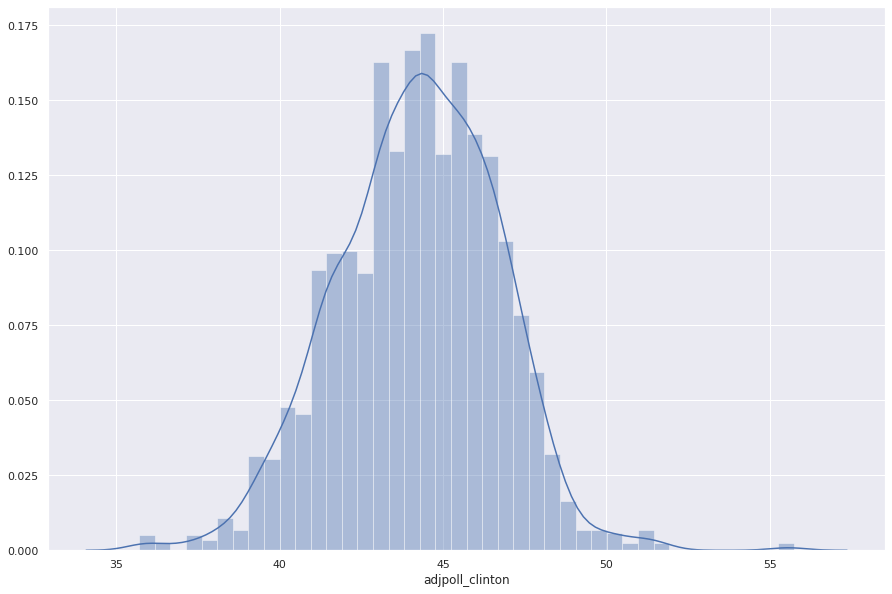

In [153]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_us_lv['adjpoll_clinton'])

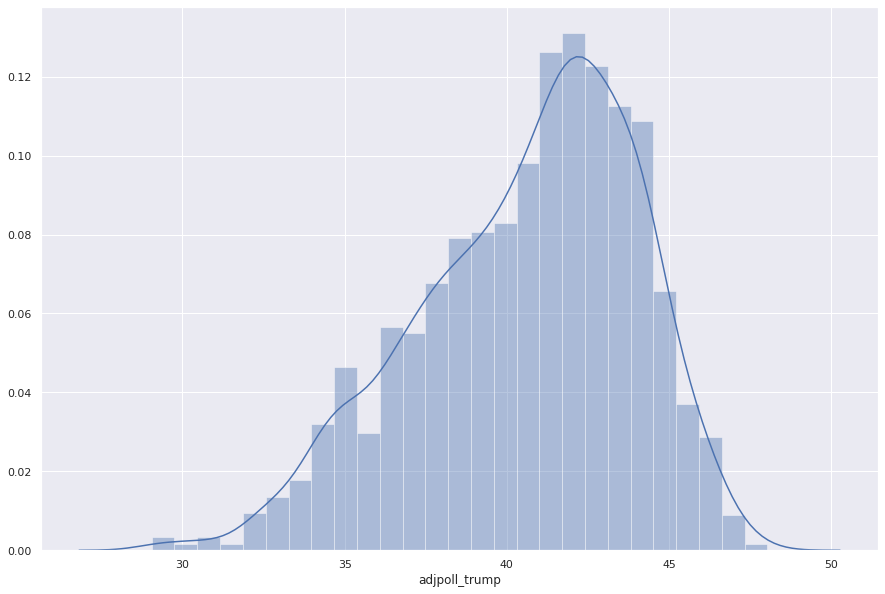

In [154]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_us_lv['adjpoll_trump'])

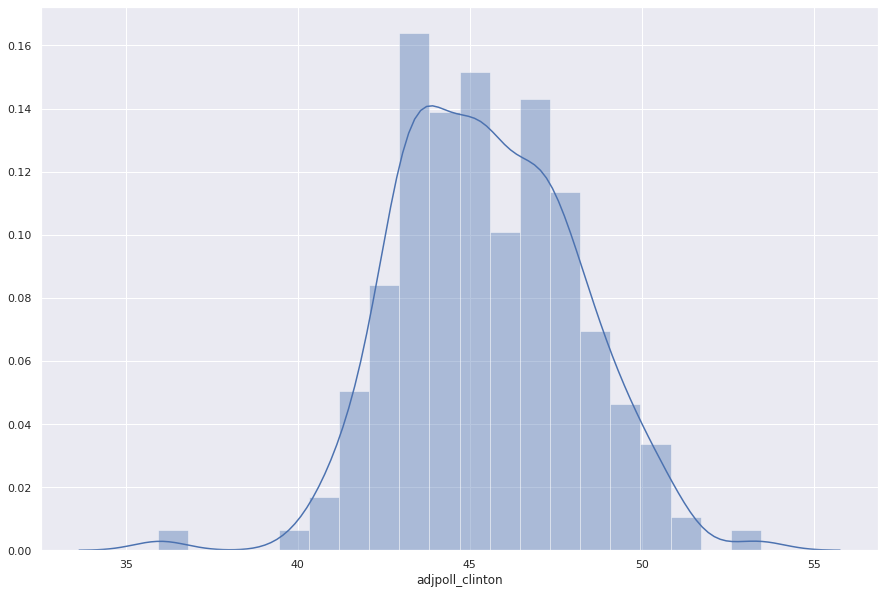

In [155]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_us_rv['adjpoll_clinton'])

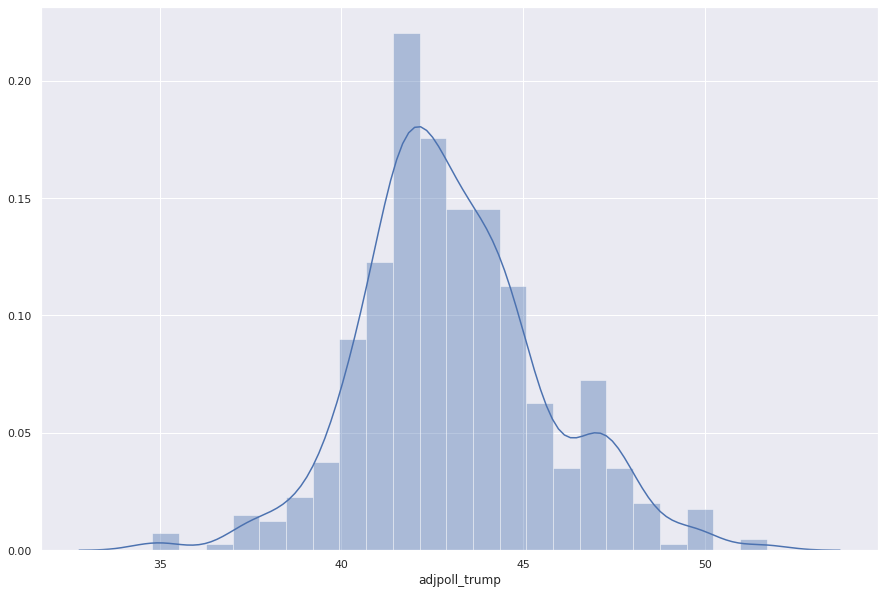

In [156]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_us_rv['adjpoll_trump'])

In [157]:
state=by_state[1:10]
print(type(state))
state

<class 'numpy.ndarray'>


array(['Virginia', 'Florida', 'Pennsylvania', 'California',
       'North Carolina', 'Missouri', 'Colorado', 'Arizona',
       'New Hampshire'], dtype=object)

In [158]:

#state_mean=[]
#for st in state:
 # state_mean.append(df[st])
#state_mean

states = []
for s in state:
  states.append(df[df.state==s])

#print(type(states))
#print(states[0])

print(state)

means_clinton=[]
for dataset in states:
    means_clinton.append(dataset.adjpoll_clinton.mean()) 

#print(type(means_clinton))
print(means_clinton)

means_trump=[]
for dataset in states:
    means_trump.append(dataset.adjpoll_trump.mean()) 

#thisdict={}
#k=0
#for i in means_trump:
 #   thisdict[state[k]]=i
  #  k=k+1
#thisdict


['Virginia' 'Florida' 'Pennsylvania' 'California' 'North Carolina'
 'Missouri' 'Colorado' 'Arizona' 'New Hampshire']
[45.90238544600937, 45.16197213888888, 45.78173463157895, 54.93409660606061, 44.147394884488435, 39.14555581699346, 43.360631551724154, 41.69795844444444, 45.01457052845528]


<BarContainer object of 9 artists>

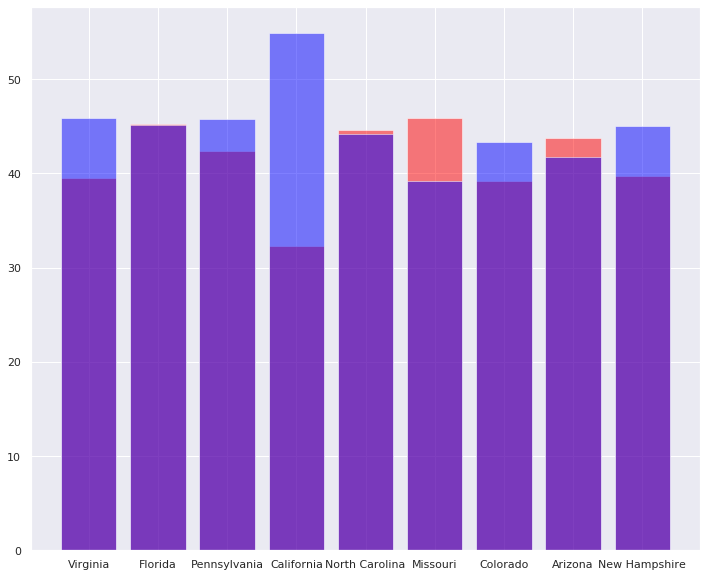

In [161]:
#ypos=np.arange(len(state))
plt.figure(figsize=(12,10))
plt.bar(state,means_trump,align='center',alpha=0.5,color='red')
plt.bar(state,means_clinton,align='center', alpha=0.5,color='blue')
#plt.xticks(ypos,state)
#plt.show()